In [20]:


import numpy as np
from scipy.integrate import odeint

from matplotlib.pyplot import plot, xlabel, ylabel

# parameters
r = 1.
K = 1.
D = 1 #0.1

# the size of the spatial domain
# his is actual size, such as "kilometres"
L = 50.
# the number of points in the grid
grid_size = 100
# the integration times
t = np.arange(0, 300, 0.1)
# the grid
dx = L / (grid_size+1)
grid = np.arange(0, L, dx)[1:-1]

# the initial condition, consisting of a small "square" in the middle
y0 = np.zeros_like(grid)
y0[grid_size//2 - 2:grid_size//2 + 2] = 0.1

# let's define the flux
def fkpp(y, t, r, K, D, dx):
    #nějak udělat první derivaci,a le nevím jak???
    
    # we calculate the spatial second derivative
    d2x = -2 * y
    d2x[1:-1] += y[2:] + y[:-2]
    d2x[0] += y[1]
    d2x[-1] += y[-2]
    d2x = d2x/dx/dx
    # then add the reaction terms
    #jak sem přidat ten druhej člen???
    dy = r * y * (1. - y/K) + D * d2x
    return dy

y = odeint(fkpp, y0, t, (r, K, D, dx))

In [18]:
pp = np.array([0.,  0.,  0.,  0.1, 0.1, 0.1, 0.1, 0.,  0.,  0. ])
d2 = -2*pp
print(d2)
d2[1:-1] += pp[2:] + pp[:-2]
print(d2)
d2[0] += pp[1]
print(d2)
d2[-1] += pp[-2]
print(d2)
d1 = d2/dx
d2 = d2/dx/dx
print(d2)
#a[1:-1] += 

print(d1)
#a 

[-0.  -0.  -0.  -0.2 -0.2 -0.2 -0.2 -0.  -0.  -0. ]
[-0.   0.   0.1 -0.1  0.   0.  -0.1  0.1  0.  -0. ]
[ 0.   0.   0.1 -0.1  0.   0.  -0.1  0.1  0.  -0. ]
[ 0.   0.   0.1 -0.1  0.   0.  -0.1  0.1  0.   0. ]
[ 0.       0.       0.00576 -0.00576  0.       0.      -0.00576  0.00576
  0.       0.     ]
[ 0.     0.     0.024 -0.024  0.     0.    -0.024  0.024  0.     0.   ]


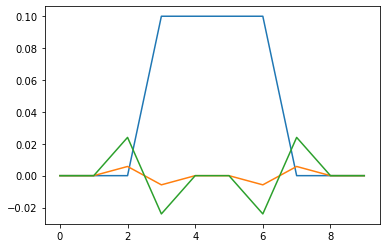

In [19]:
import matplotlib.pyplot as plt
plt.plot(pp)
plt.plot(d2)
plt.plot(d1)
plt.show()

Text(0, 0.5, 'population density')

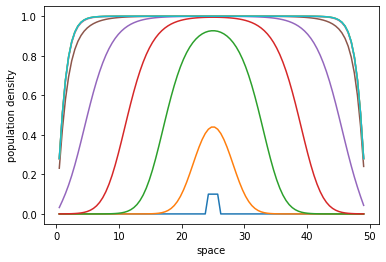

In [21]:
# let us plot the solution

for i in np.linspace(t[0], t[-1], 10):
    plot(grid, y[int(i),:])
xlabel('space')
ylabel('population density')

In [5]:
# now for some real fun! let's animate the solution!

# THIS WILL NOT WORK IN THE NOTEBOOK
# you have to copy this into an ipython shell and run it there

def animate(grid, data, skip_frames=1, labelx='x', labely='', labels=[], log=False):
    import matplotlib
    # this is required. In case of problems, try one of:
    # GTK, GTKAgg, TkAgg, WX, WXAgg
    matplotlib.use('GtkAgg')
    from pylab import plot, legend, xlabel, ylabel, ion, draw, ylim, yscale
    import time

    ion()

    nvars = shape(data)[1]//len(grid)
    ldata = [ data[:,i*len(grid):(i+1)*len(grid)] for i in range(nvars) ]
    lines = []
    for d in ldata:
        lines.append(plot(grid, d[0])[0])
    xlabel(labelx)
    ylabel(labely)
    if len(labels) == nvars:
        legend(labels)
    ymin = 0 if data.min() > 0 else floor(data.min())
    ylim((ymin, ceil(data.max())))
    if log:
        yscale('log')
        ylim((1e-25, 15))
    for l in range(len(lines)):
        lines[l].set_ydata(ldata[l][0])  # initial condition
    draw()
    time.sleep(0.1)
    tstart = time.time()               # for profiling
    for i in range(1, shape(data)[0]//skip_frames):
        for l in range(len(lines)):
            lines[l].set_ydata(ldata[l][i*skip_frames])  # update the data
        draw()                         # redraw the canvas

    print('FPS:' , shape(data)[0]/(time.time()-tstart))

animate(grid, y)

ValueError: 'gtkagg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']